# Сервис доставки еды «Всё.из.кафе»
## Поиска инсайтов и точек роста

Дата: 27.08.2025

### Описание
Конкуренты сервиса доставки еды «Всё.из.кафе» не дремлют, и руководство ждёт от продукта роста. Найти инсайты, которые позволят сервису повысить показатель удержания пользователей и улучшить взаимодействие с партнёрами.

Необходимо помочь бизнесу ответить на следующие вопросы:
- Как ведут себя пользователи? Как наиболее эффективно выстроить работу с ними, чтобы они продолжали пользоваться продуктом?
- Какой путь проходят пользователи в сервисе? Где «проваливаются»?
- Как улучшить взаимодействие с партнёрами-ресторанами?

### Задачи 

В рамках данного проекта провести комплексный анализ данных:
- изучить пользовательский путь и проанализировать конверсии через воронки;
- сегментировать пользователей с помощью RFM-модели для оценки лояльности и поведения клиентов;
- кластеризировать рестораны методом K-Means, чтобы выделить группы с разными моделями работы и разработать персонализированные маркетинговые стратегии.

Ближе познакомиться с работой сервиса, выявить узкие места и предложить решения для удержания пользователей и повышения эффективности сотрудничества с ресторанами.


### Данные

Данные включают следующие сведения:
      
- `visitor_uuid` — идентификатор посетителя. Это идентификатор, который присваивается системой любому новому пользователю вне зависимости от того, зарегистрировался он в продукте или нет.
- `user_id` — идентификатор зарегистрированного пользователя. Присваивается посетителю после создания учётной записи: ввода логина, пароля, адреса доставки и контактных данных.
- `device_type` — тип платформы, с которой посетитель зашёл в продукт.
- `city_id` — город, из которого посетитель зашёл в сервис.
- `source` — рекламный источник привлечения посетителя.
- `first_date` — дата первого посещения продукта.
- `visit_id` — уникальный идентификатор сессии.
- `event` — название аналитического события.
- `datetime` — дата и время события.
- `rest_id` — уникальный идентификатор ресторана (заполняется для заказов, карточек ресторанов и блюд).
- `object_id` — уникальный идентификатор блюда (заполняется для заказов и карточек блюд).
- `order_id` — уникальный идентификатор заказа.
- `revenue` — выручка от заказа (в рублях). Это та сумма, которую пользователь видит при оплате.
- `delivery` — стоимость доставки (в рублях).
- `commission` — комиссия, которую «Всё.из.кафе» берёт с выручки ресторана, в процентах.

    
### План проекта
- Загрузка данных и их предобработка.
- Анализ пользовательского пути новых пользователей.
- RFM сегментация.
- K-Means кластеризация.
- Итоговый вывод и рекомендации.

---

## Загрузка данных и их предобработка

### Загрузка библиотек

In [1]:
# Загружаем библиотеку Pandas
import pandas as pd

In [2]:
from datetime import datetime, timedelta

In [3]:
import numpy as np

In [4]:
# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Подключаем модуль для работы с операционной системой.
# Принудительно ограничиваем количество потоков для библиотеки OpenMP (которую использует KMeans для вычислений) до одного.
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [6]:
# Для этапа предварительной обработки перед ML
from sklearn.preprocessing import StandardScaler

In [7]:
# Импортируем класс алгоритма кластеризации KMeans из библиотеки scikit-learn
from sklearn.cluster import KMeans

In [8]:
# Уменьшение разрешения DPI для графиков 
plt.rcParams['figure.dpi'] = 72

### Загрузка данных

In [9]:
try:
#пробуем загрузить 
    df_insides = pd.read_csv('datasets/insides_data.csv', parse_dates=['first_date', 'datetime'])
    display(f'Файл успешно загружен  в датафрейм df_insides') 
except:
    # если не получилось
    display(f'Ошибка при загрузке файла')     

'Файл успешно загружен  в датафрейм df_insides'

Смотрим структуру данных и сами данные.

In [10]:
display(df_insides.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205510 entries, 0 to 205509
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   visitor_uuid  205510 non-null  object        
 1   user_id       205510 non-null  float64       
 2   device_type   205510 non-null  object        
 3   city_id       205510 non-null  int64         
 4   source        205510 non-null  object        
 5   first_date    205510 non-null  datetime64[ns]
 6   visit_id      205510 non-null  int64         
 7   event         205510 non-null  object        
 8   datetime      205510 non-null  datetime64[ns]
 9   rest_id       166915 non-null  object        
 10  object_id     21308 non-null   float64       
 11  order_id      7008 non-null    float64       
 12  revenue       7008 non-null    float64       
 13  delivery      7008 non-null    float64       
 14  commission    21308 non-null   float64       
dtypes: datetime64[ns]

None

In [11]:
display(df_insides.head())

,visitor_uuid,user_id,device_type,city_id,source,first_date,visit_id,event,datetime,rest_id,object_id,order_id,revenue,delivery,commission
0,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,authorization,2021-05-01 16:07:53,NaN,NaN,NaN,NaN,NaN,NaN
1,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,reg_page,2021-05-01 16:09:16,NaN,NaN,NaN,NaN,NaN,NaN
2,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,confirm_phone,2021-05-01 16:09:19,NaN,NaN,NaN,NaN,NaN,NaN
3,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,login,2021-05-01 16:09:23,NaN,NaN,NaN,NaN,NaN,NaN
4,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,main_page,2021-05-01 16:09:34,2c6095730b514c189ee41c65f03febc3,NaN,NaN,NaN,NaN,NaN


In [12]:
#Проверим на наличие явных дубликатов в данных по всем столбцам
display(f'Явных дубликатов по всем столбцам: {df_insides.duplicated().sum()}.\
        Это {df_insides.duplicated().sum()/df_insides.shape[0]} %')

'Явных дубликатов по всем столбцам: 0.        Это 0.0 %'

In [13]:
# Проверим на дубликаты посетитель + идентификатор сессии + событие + время события
display(f'Дублирующихся событий по посетителю: {df_insides.duplicated(subset=["visitor_uuid","visit_id","event","datetime"]).sum()}')

'Дублирующихся событий по посетителю: 0'

In [14]:
# Проверим интервал дат в данных
display(f'Интервал дат "first_date": "{df_insides["first_date"].dt.date.min()} - {df_insides["first_date"].dt.date.max()}')

'Интервал дат "first_date": "2021-04-30 - 2021-07-01'

In [15]:
display(f'Интервал дат "datetime": "{df_insides["datetime"].dt.date.min()} - {df_insides["datetime"].dt.date.max()}')

'Интервал дат "datetime": "2021-05-01 - 2021-07-02'

In [16]:
display(f'Количество уникальных посетителей: {df_insides["visitor_uuid"].nunique()}')

'Количество уникальных посетителей: 8891'

In [17]:
display(f'Количество уникальных зарегистрированных пользователей: {df_insides["user_id"].nunique()}')

'Количество уникальных зарегистрированных пользователей: 8473'

In [18]:
display(f'Количество уникальных ресторанов: {df_insides["rest_id"].nunique()}')

'Количество уникальных ресторанов: 21'

Датафрейм <b>df_insides</b> содержит <b>15</b> столбцов и <b>205510</b> строк. Данные соответствуют заявленным и содержат информацию о действиях пользователей в приложении заказа готовой еды из кафые. В данных присутствуют пропуски в той части, которая относится к заказам блюд. Дубликатов не обнаружено.

---

## Анализ пользовательского пути

Маркетологи стали замечать следующее: деньги на рекламу по-прежнему тратятся, а заказов стало меньше. И это несмотря на то, что приложение скачивается и устанавливается так же активно, как раньше. Складывается ощущение, что пользователи где-то теряются. При этом доля заказов с десктопной версии приложения увеличилась по сравнению с мобильной.

Разработчики говорят, что последние обновления мобильной версии приложения не должны были повлиять на каталог блюд или его выбор для заказа и последующей оплаты доставки, так как изменения касались нового алгоритма подтверждения мобильного телефона и адреса доставки.

С помощью воронок изучим общий пользовательский путь новых пользователей и сравним поведение пользователей мобильной и десктопной версий приложения. 

### Классическая и step-by-step воронки по всем данным

**Задача 2.1.** Построим и визуализирем общую воронку (по всем данным), затем опишем пользовательский путь: какие этапы представлены, какова их последовательность, на каком (или на каких) этапах теряется большая часть новых пользователей.
    
Строим две воронки: 
- **классическую воронку** — доля от первого шага в процентах
- **step-by-step** — с конверсией от предыдущего этапа.

Предполагается, что пользователь проходит такой путь к оформлению доставки блюда из ресторанов:
1. `authorization` — авторизация пользователя — запуск приложения.
2. `main_page` — загрузка основной страницы приложения.
2. `reg_page` — переход на страницу регистрации.
2. `confirm_phone` — подтверждение телефона (окончание процесса регистрации).
2. `object_page` — страница блюда.
2. `add_to_cart` — переход в корзину.
2. `order` — оформление заказа.    

In [19]:
# Задаем порядок шагов в воронке
funnel_steps = ['authorization', 'main_page', 'reg_page', 'confirm_phone', 'object_page', 'add_to_cart', 'order']

In [20]:
# Поверим наличие шагов воронки в данных
display(df_insides['event'].unique())

array(['authorization', 'reg_page', 'confirm_phone', 'login', 'main_page',
       'object_page', 'add_to_cart', 'order'], dtype=object)

Видим, что дополнительно, кроме обозначенных шагов,  присутствует шаг 'login'.

In [21]:
# Фильтруем датасет оставляя только нужные шаги воронки
funnel_df_steps = df_insides.loc[df_insides['event'].isin(funnel_steps)]

In [22]:
# Считаем число уникальных пользователей на каждом шаге
funnel_counts = funnel_df_steps.groupby('event')['user_id'].nunique().reindex(funnel_steps)

In [23]:
# Собираем таблицу воронки
funnel_df = pd.DataFrame({
   'step': pd.Series(funnel_counts.index),
   'users': pd.Series(funnel_counts.values)
})

In [24]:
# Добавляем конверсии и округляем до 1 знака после запятой
funnel_df['conversion_from_first_%'] = round((funnel_df['users'] / funnel_df['users'].iloc[0]) *100, 1)
funnel_df['conversion_from_previous_%'] = round(funnel_df['users'] / funnel_df['users'].shift(1) * 100,1)

In [25]:
display(funnel_df.head(7))

,step,users,conversion_from_first_%,conversion_from_previous_%
0,authorization,7410,100.0,NaN
1,main_page,6537,88.2,88.2
2,reg_page,5417,73.1,82.9
3,confirm_phone,4190,56.5,77.3
4,object_page,3453,46.6,82.4
5,add_to_cart,2899,39.1,84.0
6,order,2416,32.6,83.3


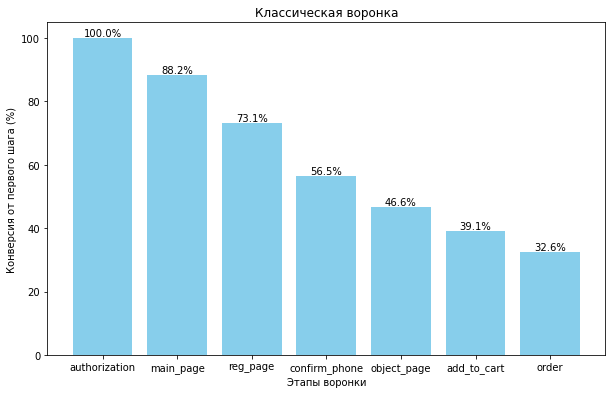

In [26]:
# Визуализируем классическую воронку
plt.figure(figsize=(10, 6))

bars = plt.bar(funnel_df['step'], funnel_df['conversion_from_first_%'], color='skyblue')

for bar in bars:
    yval = bar.get_height() # высота столбца=значение
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}%', verticalalignment='bottom', horizontalalignment='center')
    # комментарий для себя: можно также писать va= ha=

    plt.title('Классическая воронка')
plt.ylabel('Конверсия от первого шага (%)')
plt.xlabel('Этапы воронки')
plt.show()

**Вывод:** По классической воронке уменьшение количества пользователей происходит равномерно на каждом следующем шаге. До последнего шага воронки - заказа - доходит 1/3 пользователей - 32,6% от первоначального количества.

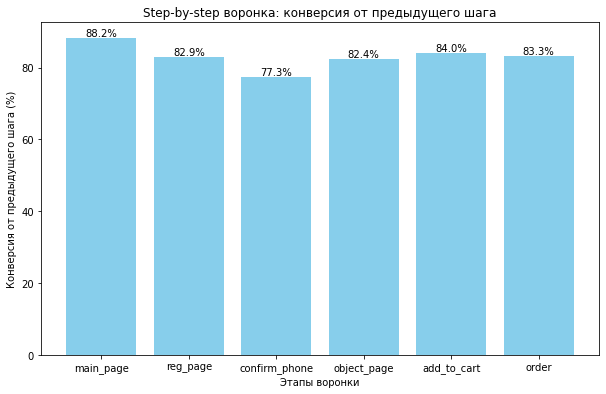

In [27]:
# Визуализируем воронку step-by-step 
funnel_df = funnel_df.iloc[1: ] # чтобы не отображать самый первый шаг с Nan

plt.figure(figsize=(10, 6))

bars = plt.bar(funnel_df['step'], funnel_df['conversion_from_previous_%'], color='skyblue')

for bar in bars:
    yval = bar.get_height() # высота столбца=значение
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}%', verticalalignment='bottom', horizontalalignment='center')

plt.title('Step-by-step воронка: конверсия от предыдущего шага')
plt.ylabel('Конверсия от предыдущего шага (%)')
plt.xlabel('Этапы воронки')
plt.show()

**Вывод:** По воронке step-by-step больше всего теряется пользователей на этапе 'confirm_phone' — подтверждение телефона (окончание процесса регистрации). Возможно, проблема возникает от неудачного интерфейса. Необходимо исследовать на каких типах устройств падение больше - мобильных или десктопных.

### Сравнение step-by-step воронок для пользователей разных устройств

**Задача 2.2.** Сравним пользовательский путь в двух приложениях: в мобильной версии и десктопной. Для этого постром и визуализируем **две воронки step-by-step**: для новых пользователей **мобильной** и **десктопной** версий приложения.
    
Сравним результаты между собой и проанализируем, есть ли различия в пользовательском пути для различных приложений.

In [28]:
# Поверим, какие платформы присутствуют в данных
display(df_insides['device_type'].unique())

array(['Desktop', 'Mobile'], dtype=object)

Разделим датасет на два подмножества: mobile и desktop.

In [29]:
# Разделим данные по платформам
desktop_df = funnel_df_steps.loc[funnel_df_steps['device_type'] == 'Desktop']
mobile_df = funnel_df_steps.loc[funnel_df_steps['device_type'] == 'Mobile']

In [30]:
# Для desktop - считаем количество клиентов на каждом шаге
counts_desktop_agg = desktop_df.groupby('event')['user_id'].nunique().reindex(funnel_steps)

In [31]:
# Для desktop - cчитаем конверсию от предыдущего шага и округляем значение до 1 знака после запятой
desktop_funnel = (counts_desktop_agg.values / counts_desktop_agg.shift(1) * 100).round(1)

In [32]:
# Для mobile - считаем количество клиентов на каждом шаге
counts_mobile_agg = mobile_df.groupby('event')['user_id'].nunique().reindex(funnel_steps)

In [33]:
# Для mobile - cчитаем конверсию от предыдущего шага и округляем значение до 1 знака после запятой
mobile_funnel = (counts_mobile_agg.values / counts_mobile_agg.shift(1) * 100).round(1)

In [34]:
# Соберём через словарь данные в датафрейм и исключим первый шаг для каждого элемента
funnel_compare = pd.DataFrame({
   'step': funnel_steps[1:],
   'mobile': mobile_funnel[1:].values,
   'desktop': desktop_funnel[1:].values
})

In [35]:
print(funnel_compare.head(7))

            step  mobile  desktop
0      main_page    83.3     91.1
1       reg_page    88.4     79.4
2  confirm_phone    55.1     90.2
3    object_page    72.5     85.8
4    add_to_cart    86.7     82.9
5          order    85.8     82.3


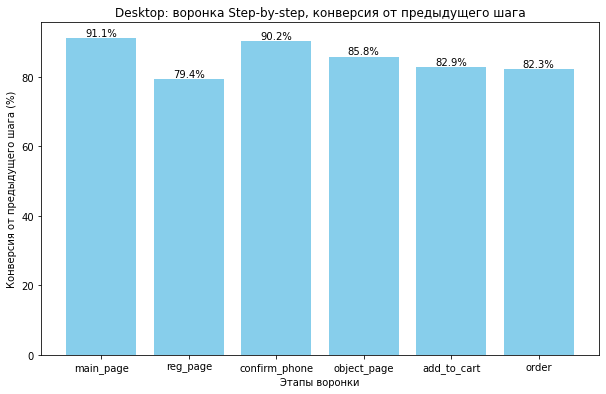

In [36]:
# Визуализируем воронку step-by-step для desktop
plt.figure(figsize=(10, 6))

bars = plt.bar(funnel_compare['step'], funnel_compare['desktop'], color='skyblue')

for bar in bars:
    yval = bar.get_height() # высота столбца=значение
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}%', verticalalignment='bottom', horizontalalignment='center')


plt.title('Desktop: воронка Step-by-step, конверсия от предыдущего шага')
plt.ylabel('Конверсия от предыдущего шага (%)')
plt.xlabel('Этапы воронки')
plt.show()

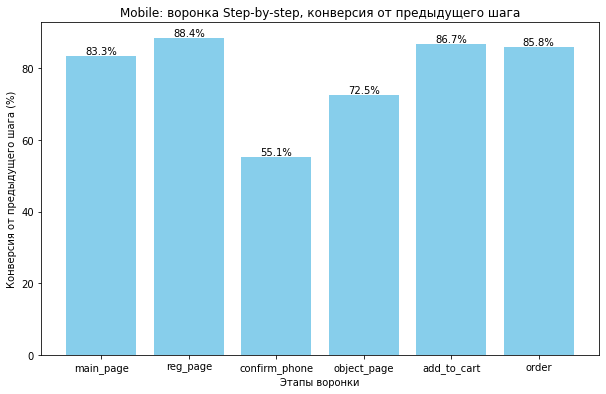

In [37]:
# Визуализируем воронку step-by-step для mobile
plt.figure(figsize=(10, 6))

bars = plt.bar(funnel_compare['step'], funnel_compare['mobile'], color='skyblue')

for bar in bars:
    yval = bar.get_height() # высота столбца=значение
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}%', verticalalignment='bottom', horizontalalignment='center')

plt.title('Mobile: воронка Step-by-step, конверсия от предыдущего шага')
plt.ylabel('Конверсия от предыдущего шага (%)')
plt.xlabel('Этапы воронки')
plt.show()

Для наглядности построим совместный график

In [38]:
# Для подписей данных по оси X изменним индекс
funnel_graf = funnel_compare.set_index('step')

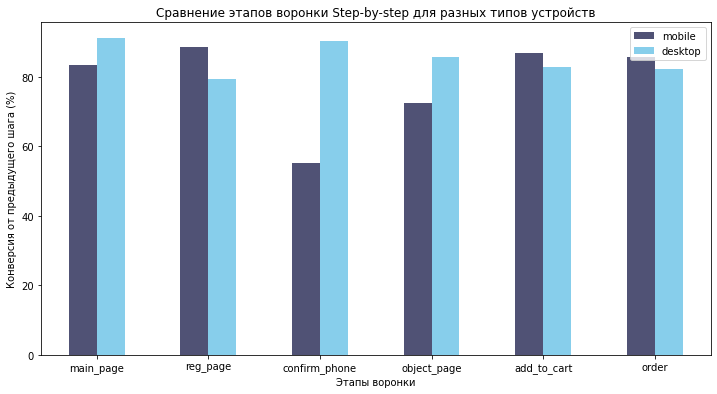

In [39]:
funnel_graf.plot(kind='bar',
                    figsize=(12,6),
                    title='Сравнение этапов воронки Step-by-step для разных типов устройств',
                    ylabel='Конверсия от предыдущего шага (%)',
                    xlabel='Этапы воронки',
                    rot=0,
                    legend=True,
                    color=['#505275','#87ceeb'])         

plt.show()

**Вывод:** поведение пользователей на разных типах устройств различается. Рассмотрим по шагам воронки, начиная со второй.
- После запуска приложения до главной страницы приложения доходит больше пользователей desktop-устройств - 91,1% против 83,3% на мобильных.
- Следующий этап - переход на страницу регистрации - происходит лучше на мобильных -  88.4% против 79.4%.
- Самая большая разница наблюдается в следующем шаге - подтверждение телефона (окончание процесса регистрации) -  55.1% на мобильных и  90.2 - на десктопах.
- Также наблюдается значительная разница на следующем шаге - переход на страницу блюда - на мобильных устройствах 72.5% и 85.8% на desktop.
- Количество пользователей, перешедших в следующие два этапа воронки с предыдущего - переход в корзину и — оформление заказа - на разных устройствах практически одинаков: 86.7% и 82.9%, 85.8% и 82.3%  для мобильных и десктопов соответственно.

Необходимо проанализировать падение конверсии для мобильных на этапе воронки "подтверждение телефона", а также этап "преход на страницу блюда". Возможно, с мобильной версии приложения тяжело подтвердить номер телефона, возможно, сложность вызывает переключение между экранами, и пользоватлеь просто теряется. И далее, также сложно с телефона возвращаться в экран с выбором блюда.

---

## RFM сегментация

У сервиса доставки еды не такое высокое удержание пользователей: в первый день возвращается около 14% посетителей, а на седьмой день и того меньше — около 4–5%. Маркетологи хотят запустить несколько рекламных кампаний, направленных на удержание платящих пользователей и их возврат в сервис, если они давно не совершали заказы.

Для этого необходимо сегментировать пользователей на различные поведенческие сегменты с помощью RFM-сегментации по трём показателям: 
- **давность** (Recency), 
- **частота покупок** (Frequency), 
- **сумма трат** (Monetary).

В качестве даты анализа установите **03 июля 2021 года**.

### Расчет RFM-показателя для каждого пользователя

**Задача 3.1.** Для каждого покупателя посчитайте:
- количество дней с последней покупки — давность (R);
- частоту покупок (F);
- стоимость всех покупок — сумму трат (M).
    
В качестве даты анализа установите **03 июля 2021 года**. После этого постройте три гистограммы и проанализируйте их.

In [40]:
# Выделим в отдельный датасет все заказы
df_orders = df_insides.loc[df_insides['event'] == 'order']

In [41]:
display(f'Проверка: выручка с отрицательным значением - {df_orders.loc[df_orders["revenue"] < 0].shape[0]} записей')

'Проверка: выручка с отрицательным значением - 0 записей'

In [42]:
display(f'Проверка: выручка = 0 - {df_orders.loc[df_orders["revenue"] == 0].shape[0]} записей')

'Проверка: выручка = 0 - 0 записей'

In [43]:
# Считаем количество дней с момента каждой покупки до даты анализа 
df_orders = df_orders.copy()
df_orders['order_recency'] = (pd.to_datetime('2021-07-03') - df_orders['datetime']).dt.days

In [44]:
# Группируем по покупателю и считаем показатели
df_users_RFM = df_orders.groupby('user_id').agg(recency = ('order_recency', 'min'),
                                                frequency = ('order_id', 'count'),
                                                monetary = ('revenue', 'sum')).reset_index()

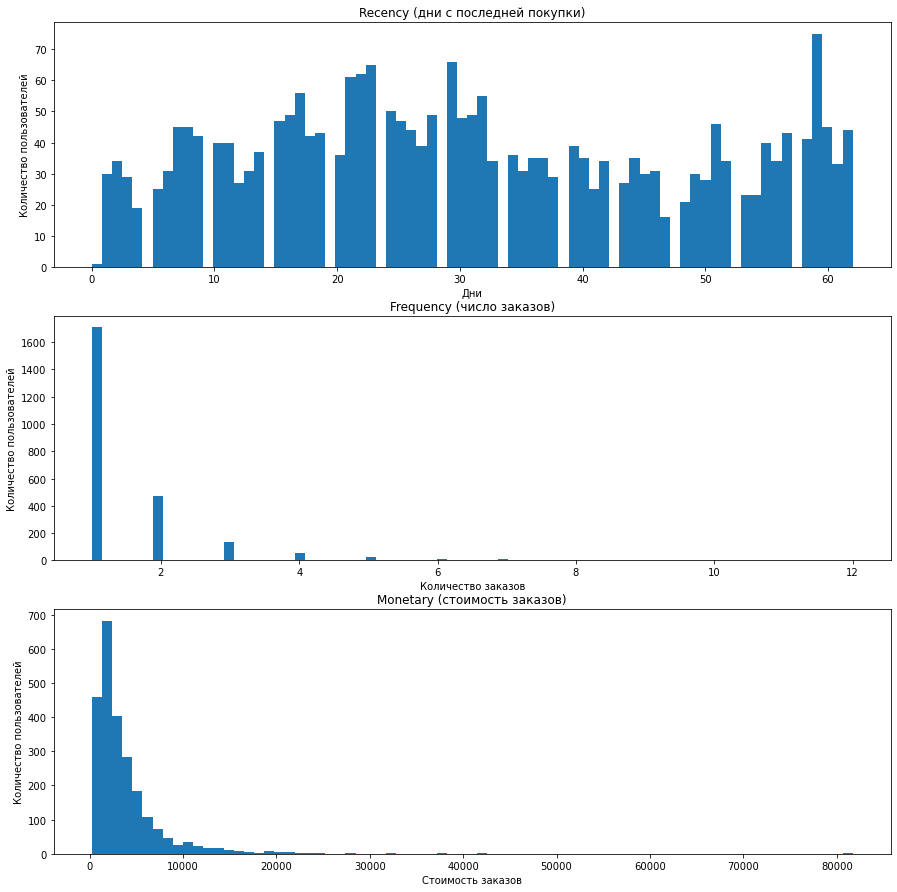

In [45]:
# Строим три гистограммы
fig, axes = plt.subplots(3, 1, figsize=(15, 15))

# Давность
axes[0].hist(df_users_RFM['recency'], bins=75)
axes[0].set_title('Recency (дни с последней покупки)')
axes[0].set_xlabel('Дни')
axes[0].set_ylabel('Количество пользователей')

# Частота
axes[1].hist(df_users_RFM['frequency'], bins=75)
axes[1].set_title('Frequency (число заказов)')
axes[1].set_xlabel('Количество заказов')
axes[1].set_ylabel('Количество пользователей')

# Сумма всех заказов
axes[2].hist(df_users_RFM['monetary'], bins=75)
axes[2].set_title('Monetary (стоимость заказов)')
axes[2].set_xlabel('Стоимость заказов')
axes[2].set_ylabel('Количество пользователей')

plt.show()

У показателя "Monetary" на гистограмме - длинный хвост. Дополнительно построим отдельную визуализацию, отфильтровав выбросы.

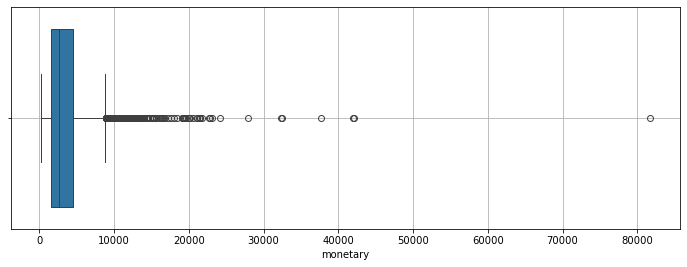

In [46]:
# построим диаграмму размаха по Выручке, чтобы определиться как ограничивать
plt.figure(figsize=(12,4))
sns.boxplot(x=df_users_RFM['monetary'])
plt.grid()
plt.show()

In [47]:
#Отфильтруем выбросы - все, что выше 8000 (верхняя граница)
df_users_RFM_limit = df_users_RFM.loc[df_users_RFM['monetary'] < 8000] 

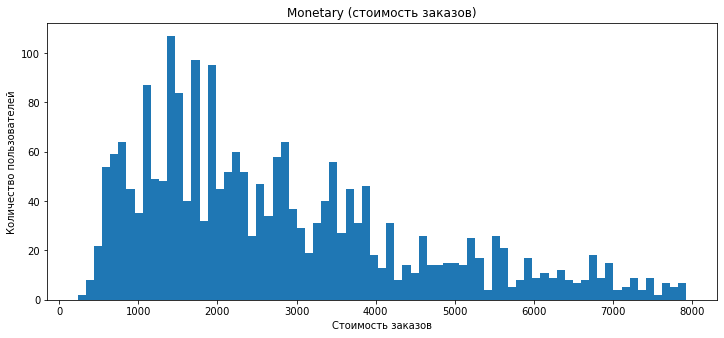

In [48]:
# Строим гистограмму по Выручке
plt.figure(figsize=(12,5))
plt.hist(df_users_RFM_limit['monetary'], bins=75)
plt.title('Monetary (стоимость заказов)')
plt.xlabel('Стоимость заказов')
plt.ylabel('Количество пользователей')
plt.show()

Выводы:
1. У метрики Recency широкий диапазон значений от (0 до 60) с провалами через равные промежутки времени. Скорее всего, это говорит о том, пользователи не совершают покупок или приложение не работает в определенные дни. Визуально можно отметить, что,  в среднем, заказы чаще всего оформляются раз в 25, 30 дней или 60 дней. Пользователей, которые часто оформляют заказ (от 1 до 5 дней) гораздо меньше, но они тоже есть, что говорит о наличии заинтересованной постоянной аудитории.
2. Число заказов варьируется в диапазоне, от 1 до 12. Преобладают пользователи с 1 заказом. Количество повторных заказов гораздо меньше, заказов 3 и более - малое количество.
3. Распределение метрики Monetary - нормальное с длинным правым хвостом. Есть пользователи и с недорогими заказами (до 1000), но чаще всего стоимость заказа - 1500 р. Заказов стоимостью выше 8000 р. - мало, поэтому на визуализации их отбросили.

### Выделение RFM-сегментов и распределение по ним пользователей.

**Задача 3.2.** Выделите **RFM-сегменты** и изучите распределение пользователей по ним.
    
Применим следующие подходы к выделению RFM сегментов:
- **Recency** — разделим на три равные группы.
- **Frequency** —  разделим на три группы: 
    - пользователи с 1 заказом (F-сегмент с небольшим количеством заказов);
    - пользователи с 2 заказами (F-сегмент со средним количеством заказов);
    - пользователи с 3 и более заказами (F-сегмент с большим количеством заказов).
- **Monetary** — разделим на три группы по 33-му и 66-му перцентилям.
    
Посчитаем количество покупателей в каждом сегменте.

In [49]:
# Определяем группу пользователя по количеству дней с момента последнего заказа: 
df_users_RFM['R'] = pd.cut(df_users_RFM['recency'], bins=3, labels=[3,2,1])

In [50]:
# Определяем группу пользователя по количеству заказов: 
df_users_RFM['F'] = pd.cut(df_users_RFM['frequency'], [0, 1, 2, 13], labels=[1,2,3], include_lowest=True)

In [51]:
df_users_RFM['M'] =  pd.qcut(df_users_RFM['recency'], q=3, labels=[1,2,3])

In [52]:
# Находим групповой RFM-индекс:
df_users_RFM[['R','F','M']] = df_users_RFM[['R','F','M']].astype('str')
df_users_RFM['RFM'] = df_users_RFM['R'] + df_users_RFM['F'] + df_users_RFM['M']

In [53]:
# Группируем данные по сегментам и считаем их размер:
RFM_group = df_users_RFM.groupby('RFM').agg({'user_id':'nunique'}).reset_index()

In [54]:
# Считаем долю пользователей в каждом сегменте:
RFM_group['user_share'] = RFM_group['user_id'] / RFM_group['user_id'].sum()

In [55]:
# Выводим результат:
display(RFM_group.sort_values(by='user_id', ascending=False))

,RFM,user_id,user_share
4,212,557,0.230546
0,113,538,0.222682
12,311,531,0.219785
7,222,160,0.066225
1,123,146,0.060430
13,321,145,0.060017
10,232,96,0.039735
14,331,73,0.030215
2,133,49,0.020281
5,213,44,0.018212


**Вывод:** 
1. Наилучший сегмент - самые ценные клиенты (сегмент 333) - которые покупали недавно, часто и потратили много - отсутствует.


2. Также отсутствует наихудший сегмент - 111 - давние разовые низкий чек.


3. Около **67%** пользователей - это **"разовые"** пользователи, входящие в следующие сегменты (разница в количестве пользователей между сегментами невелика). 
- На 1 месте - сегмент 212 - 23% - спящие разовые средний чек. 
- 2 место - сегмент 113 - 22% - давние разовые высокий чек.
- на 3 месте - сегмент 311 ~ 22% - недавние разовые низкий чек. 

В "разовом" сегменте нужно повыщать удержание, чтобы пользователи не уходили из приложенния, например, предлагать бонусы и скидки на второй заказ.

4. Следующая группа сегментов составляет **19%** пользователей. Это **"редкие"** пользователи, делающие заказ редко.
- сегмент 222 - ~ 7% -спящие редкие средний чек.
- сегмент 123 - 6% - давние редкие высокий чек.
- сегмент 321 - 6% - недавние редкие низкий чек. 

"Редких" пользователей стоит стимулировать совершать заказ чаще - предлагать разное меню, персональные подборки.

5. **"Частые"** клиенты в сумме составляют ~9% - это лояльные пользователи.
- сегмент 232 - спящие частые средний чек
- сегмент 331 - недавние частые низкий чек 
- сегмент 133 - давние частые высокий чек

Стратегия для таких пользователей зависит от того давно или недавно клиент пользовался приложением. Если давно - необходимо напомнить сделать новый заказ. 

6. **"Спящие разовые"** - разовые пользователи, однократно пользовавшиеся приложением - в сумме составляют 3,4%
- сегмент 213 - спящие разовые высокий чек
- сегмент 211 - спящие разовые низкий чек

Возможно, их стоит "разбудить", предложив что-то персонально, особенно клиентам с высоким чеком, необходимо также вяыяснить причины ухода из приложения.

7. Сегменты, составяющие вместе ~ 1,6%. Это также **"спящие редкие и частые"**  пользователи, но делавшие больше одного заказа в приложении. 
- сегмент 221 - спящие редкие низкий чек
- сегмент 223 - спящие редкие высокий чек
- сегмент 231 - спящие частые низкий чек
- сегмент 233 - спящие частые высокий чек.

Количество пользователей в этих сегментах невелико. Стратегия зависит от конкретного сегмента.


---

## K-Means кластеризация

Чтобы лучше понимать поведение ресторанов и предлагать им персонализированные условия сотрудничества, а также создавать персонализированные предложения для пользователей, маркетологи запросили кластеризацию ресторанов по следующим параметрам:
- общее количество заказов;
- средняя стоимость заказа;
- общее число заказанных уникальных блюд (ассортимент ресторана).

С помощью метода K-Means разделим рестораны на кластеры, отражающие различные модели работы и целевые сегменты. Это позволит выделить группы ресторанов с похожими характеристиками и разрабатывать для них эффективные маркетинговые стратегии.

### Подготовка данных для кластеризации

**Задача 4.1.** Подготовим данные для кластеризации и для каждого ресторана подсчитаем:
- общее количество заказов;
- средняя стоимость заказа;
- общее число заказанных уникальных блюд (ассортимент ресторана).

In [56]:
# Выделим в отдельный датасет все заказы
df_orders = df_insides.loc[df_insides['event'] == 'order']

In [57]:
df_rest = df_orders.groupby('rest_id').agg( orders_count = ('order_id','count'),
                                            average_bill = ('revenue', 'mean'),
                                            dishes_count = ('object_id','nunique')).reset_index()

In [58]:
display(df_rest.head())

,rest_id,orders_count,average_bill,dishes_count
0,1be5a933aab34fbab594bebba48e976e,144,2260.180222,28
1,1d6bb74687104fa1953924c9684fe624,108,2959.256481,19
2,2c6095730b514c189ee41c65f03febc3,8,1673.000000,4
3,3247a3b5f9494812a3c1a73c5b61f004,33,2777.209697,4
4,39b7eab4f4704ed2886fafe171489960,33,2011.269697,5


### Вычисление оптимального количества кластеров

**Задача 4.2.** Нормализуем данные и найдем оптимальное количество кластеров, использовав метод `.inertia_`. Построим график зависимости инерции от числа кластеров (метод «локтя») и предположите оптимальное количество кластеров.

In [59]:
df_rest = df_rest.set_index('rest_id')

Перед применением K-Means лучше нормализовать данные, чтобы признаки с разными масштабами имели одинаковый вес при расчете расстояний.

In [60]:
# Нормализуем данные перед применением KMeans
scaler = StandardScaler()
df_rest_normalized = scaler.fit_transform(df_rest)

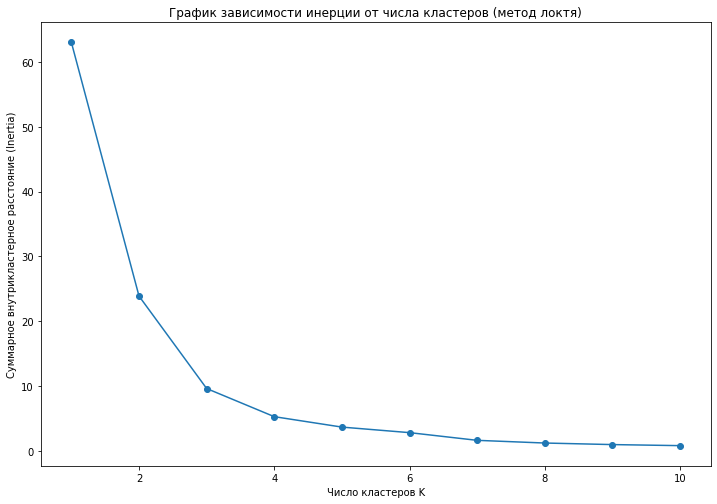

In [61]:
# Создаём массив, в котором будем хранить значения inertia для разбиения с разным числом кластеров
i = []

# Задаём диапазон количества кластеров
min_k = 1
max_k = 10

plt.figure(figsize=(12, 8))

# Перебираем разное количество кластеров
for k in range(min_k, max_k + 1):
   km = KMeans(n_clusters=k)  # Создаём модель KMeans для текущего значения k
   km.fit_transform(df_rest_normalized)  # Обучаем модель и получаем координаты точек в пространстве кластеров
   i.append(km.inertia_)  # Сохраняем значение инерции для текущего k

# Строим график зависимости инерции от количества кластеров
plt.plot(range(min_k, max_k + 1), i, marker='o')
plt.xlabel('Число кластеров K')  # Подпись оси X
plt.ylabel('Суммарное внутрикластерное расстояние (Inertia)')  # Подпись оси Y
plt.title('График зависимости инерции от числа кластеров (метод локтя)')  # Заголовок
plt.show()

**Вывод:** Точка "локтя" соответствует оптимальному количеству кластеров. В нашем случае это 4.

Дополнительно попробуем определять количество кластеров построив дендограмму - ориентироваться по цвету легче.

Поведем линию по шкалам и посчитаем сколько пересечений. 

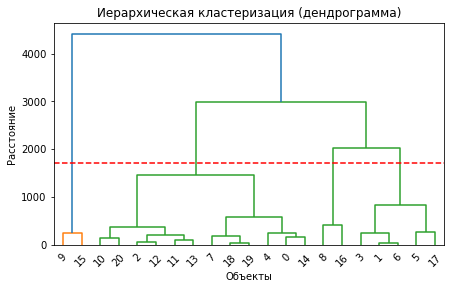

In [62]:
# Код ревьюера:
# Создадим таблицу связей:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(df_rest, method = 'ward')

# Визуализируем таблицу связей:
plt.figure(figsize=(7, 4))  
dendrogram(linked, orientation='top')

plt.axhline(y=1700, color='r', linestyle='--')  
plt.title("Иерархическая кластеризация (дендрограмма)")
plt.xlabel("Объекты")
plt.ylabel("Расстояние")

plt.show()

По дендрограмме получаем 4 кластера.

### Проверка кластеризации

**Задача 4.3.** Проведем кластеризацию, проанализируем полученные результаты и рассчитаем средние значения по каждому кластеру.
    
Визуализируем результаты, чтобы проследить зависимость признаков друг от друга. Построим две визуализации, на которые нанесем все кластеры:
- средний чек в зависимости от количества заказов;
- количество блюд в зависимости от количества заказов.

Опишием каждый кластер в промежуточном выводе. 

In [63]:
kmeans = KMeans(n_clusters=4, random_state=1)
labels = kmeans.fit_predict(df_rest)

# Сортируем кластеры по возрастанию Количества заказов (первый столбец)
sorted_indices = np.argsort(kmeans.cluster_centers_[:, 0])
sorted_centroids = kmeans.cluster_centers_[sorted_indices]

# Создаём DataFrame из центроидов
centroids_df = pd.DataFrame(
   sorted_centroids,
   columns=['Заказы', 'Ср.чек', 'Блюда'],
   index=[f'Кластер {i + 1}' for i in range(kmeans.n_clusters)]
)

# Форматируем числа для вывода (2 знака после точки)
pd.options.display.float_format = '{:.3f}'.format

# Выводим таблицу
display('Cредние значения по каждому кластеру:')
display(centroids_df.head())

'Cредние значения по каждому кластеру:'

,Заказы,Ср.чек,Блюда
Кластер 1,66.333,1982.649,8.333
Кластер 2,77.000,3120.901,10.000
Кластер 3,84.000,4657.770,2.500
Кластер 4,1100.000,2498.829,83.000


**Вывод:**
- Кластер 1: "Средняя категория" - меньше всего заказов, чек выше,чем в самом популярном сегменте,  ограниченный набор блюд. 
- Кластер 2: "Низкая категория" - невысокое количество заказов, ограниченный набор блюд и самый низкий средний чек.
- Кластер 3: "Премиальный сегмент" - невысокое количество заказов и самое ограниченное меню, но самый высокий средний чек.
- Кластер 4: "Самый популярный сегмент" - больше всего заказов, широкое меню (83 блюда, в среднем) и средний чек около 2500.

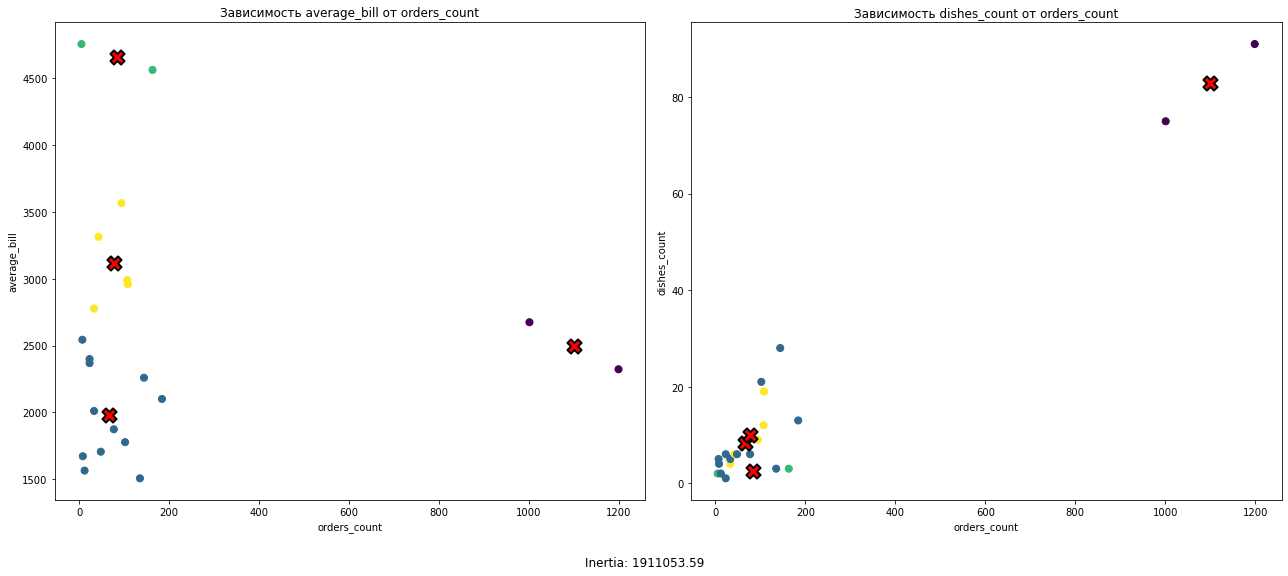

In [64]:
centroids = kmeans.cluster_centers_

# Создаём 2 графика (1 строка × 2 столбца) для отображения попарных комбинаций признаков
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Список названий признаков, которые будут использоваться на графиках
axs = ['orders_count', 'average_bill', 'dishes_count']

# Перебираем пары признаков: 
# Cредний чек от количества заказов [0,1]; Количество блюд от количества заказов [0,2]
for i, (x_idx, y_idx) in enumerate([[0, 1], [0, 2]]):
   x_label, y_label = axs[x_idx], axs[y_idx]  # Названия признаков для осей

   # Строим точки — объекты из датафрейма, раскрашенные по меткам кластера
   axes[i].scatter(
       df_rest[x_label],  # Значения по оси X
       df_rest[y_label],  # Значения по оси Y
       c=labels,  # Цвет зависит от номера кластера
       cmap='viridis',  # Цветовая карта
       s=50  # Размер точек
   )

   # Строим центроиды кластеров красными крестами
   axes[i].scatter(
       centroids[:, x_idx],  # X-координаты центров
       centroids[:, y_idx],  # Y-координаты центров
       s=200,  # Размер крестов
       c='red',  # Цвет — красный
       edgecolors='black',  # Обводка — чёрная
       linewidths=2,  # Толщина обводки
       marker='X'  # Форма маркера — крест
   )

   # Подписи осей и заголовок графика
   axes[i].set_xlabel(x_label)
   axes[i].set_ylabel(y_label)
   axes[i].set_title(f'Зависимость {y_label} от {x_label}')

# Подгоняем макет, оставляя место снизу для подписи с инерцией
plt.tight_layout(rect=[0, 0.05, 1, 1])

# Добавляем текст с СВР внизу графика (по центру)
fig.text(0.5, 0.01, f'Inertia: {kmeans.inertia_:.2f}', ha='center', fontsize=12)

# Показываем итоговый набор визуализаций
plt.show()

**Вывод:**
1. Оптимальным является заказ со средним чеком ~ 2500. С этой суммой больше всего заказов, выше этой суммы и ниже  - заказов значительно меньше.
2. Пользователи предпочитают разнообразное меню - чем меньше диапазон выбора (чем меньше блюд), тем меньше заказов. Больше всего заказов из ресторанов с количеством блюд в среднем = 80.

---

## Итоговый вывод и рекомендации

**Выводы:**
1. Качество удержания пользователей
- Зафиксирован интерес пользователей к приложению. По классической воронке до последнего шага воронки (заказа) доходит 1/3 пользователей (32,6%) от первоначального количества.
- Зафиксировано падение конверсии step-by-step на этапе воронки "подтверждение телефона (окончание процесса регистрации)" на мобильных устройствах, а также следующем этапе "преход на страницу блюда". Возможно, существуют проблемы с функционалом в  мобильной версии приложения. Необходимо протестировать UX-дизайн.

2. Как пользователи пользуются приложением

По результатам RFM-сегментации выделены следующие группы пользователей:

- **"разовые"** пользователи - 67%. В этой группе нужно повышать удержание, чтобы пользователи не уходили из приложенния, например, предлагать бонусы и скидки на второй заказ.
- **"редкие"** пользователи - 19%. Здесь нужно стимулировать совершать заказ чаще - предлагать разное меню, персональные подборки.
- **"частые"** - 9% - лояльные пользователи. Для них можно внедрять программы лояльности и персональные бонусы.
- **"спящие разовые"** - 3,4% - необходимо выявить причины ухода из предложения, предложить новое меню и новые рестораны.
- **"спящие редкие и частые"** - 1,6%. Количество невелико. Также необходимо выявить причины ухода из приложения, нужны программы для удержания и стимулирования повторных покупок. 

3. Как улучшить взаимодействие с партнерами-ресторанами.

По результатам K-Means кластериазции было выявлено 4 кластера ресторанов

- Кластер 1: "Средняя категория" - меньше всего заказов, чек выше,чем в самом популярном сегменте,  ограниченный набор блюд. 
- Кластер 2: "Низкая категория" - невысокое количество заказов, ограниченный набор блюд и самый низкий средний чек.
- Кластер 3: "Премиальный сегмент" - невысокое количество заказов и самое ограниченное меню, но самый высокий средний чек.
- Кластер 4: "Самый популярный сегмент" - больше всего заказов, широкое меню (83 блюда, в среднем) и средний чек около 2500.

Для увеличения количества заказов, а следовательно, и прибыли 
- кластерам 1,2,3 нужно стремиться к расширению меню (до 80 блюд)
- кластеру 3 - снизить средний чек до 2500.